In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import astropy.units as u
from astropy.io import fits
from pathlib import Path
from IPython.display import clear_output, display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from importlib import reload

import poppy

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

import scoobpsf
from scoobpsf.math_module import xp, _scipy
from scoobpsf.imshows import *
from scoobpsf import scoobi

import lina
from lina.math_module import xp, _scipy

lina.math_module.update_np(np)
lina.math_module.update_scipy(scipy)

pupil_diam = 6.75*u.mm
wavelength_c = 632.8e-9*u.m

this worked
Succesfully initialized testbed interface.


# set ROI to 256 or 512 depending on what sampling you want in the pupil
# make sure to use bin 4

In [9]:
from magpyx.fdpr2 import tools
from magpyx.imutils import remove_plane

In [3]:
config = tools.Configuration('fdpr2_kilo_dmdiv')

In [4]:
config = tools.Configuration('fdpr2_kian')

In [5]:
fitdict, I = tools.estimate_oneshot(config)


INFO:utils:Got semaphore index 0.
INFO:fdpr2:Estimated phase RMS: 0.14 (rad)
INFO:fdpr2:Estimated amplitude RMS: 7.7 (%)
INFO:fdpr2:Estimated Strehl: 0.97 (0.98 phase-only and 0.99 amplitude-only)
INFO:fdpr2:Updated shmims fdpr2_phase and fdpr2_amp


/opt/MagAOX/source/magpyx/magpyx/fdpr2/tools.py:521: RuntimeWarning: divide by zero encountered in log
  amp_lnrms = np.std(np.log(amp_norm)[amp_mask])#rms(np.log(amp_norm), pupil)
/opt/MagAOX/source/magpyx/magpyx/fdpr2/tools.py:121: RuntimeWarning: divide by zero encountered in log
  log_amp = np.log(amp)


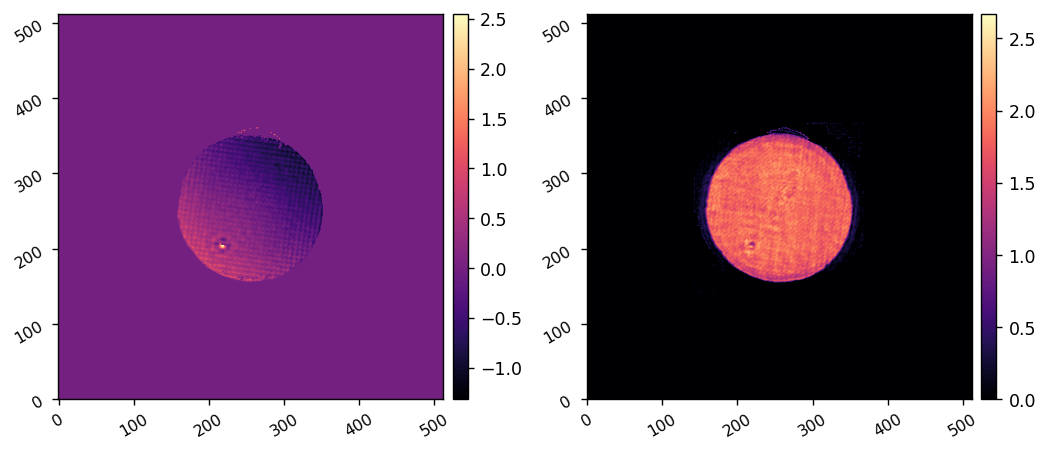

Saved data to:  phase_est_20230925.fits
Saved data to:  amp_est_20230925.fits


In [12]:
imshow2(fitdict['phase_est'], fitdict['amp_est'])

lina.utils.save_fits('phase_est_20230925.fits', fitdict['phase_est'])
lina.utils.save_fits('amp_est_20230925.fits', fitdict['amp_est'])

In [ ]:
from skimage.filters import threshold_otsu

In [ ]:
lina.phase_retrieval.fdpr(fit_mask, images, defocus_values, tol=1e-6, reg=0, wreg=10)

In [ ]:
tools.run_phase_retrieval() # feed kwargs for more control